# Sd- Image to Image

In [2]:
! pip install -qqq git+https://github.com/huggingface/diffusers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safe tensor xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.4

# Creating te pipeline :

In [7]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [14]:
seed = 777


# Loading The Initial Image :

In [56]:
from PIL import Image
init_img = Image.open("/content/apple.jpg")

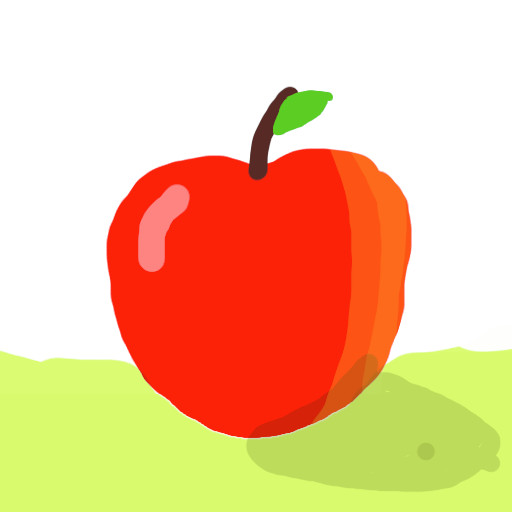

In [57]:
init_img = init_img.resize((512, 512))
init_img

#Creating a prompt:

In [58]:
prompt = "photograph of an apple "

# Generating the Image :

In [59]:
generator = torch.Generator(device=device).manual_seed(seed)

In [60]:
# Run the pipeline
img = pipe(
    prompt=prompt,
    image=init_img,
    generator=generator
).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

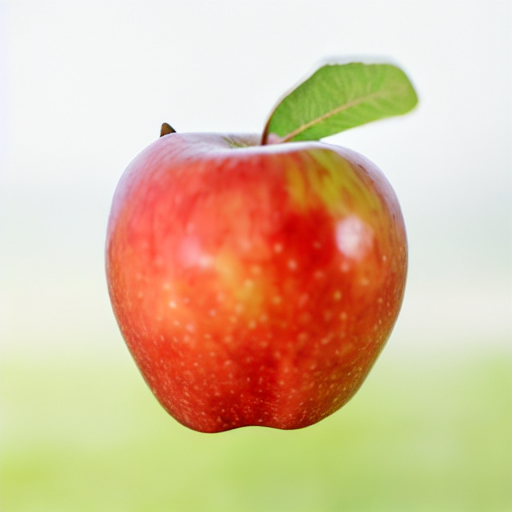

In [61]:
img

In [62]:
prompt ="photograph of an apple similar to the real world on a   green grass field , blue sky, and clouds in the background"

  0%|          | 0/40 [00:00<?, ?it/s]

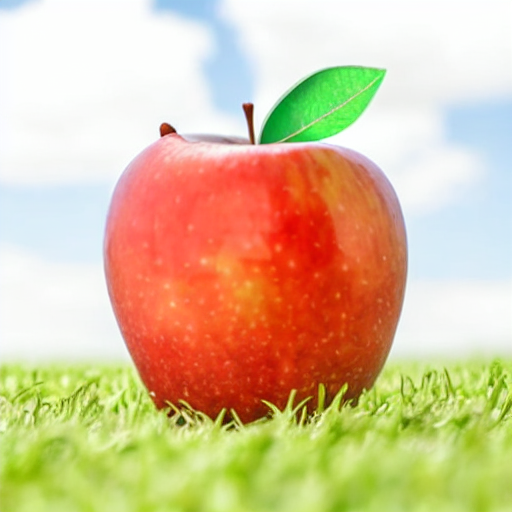

In [63]:
generator = torch.Generator(device=device).manual_seed(seed)
# Run the pipeline
img = pipe(
    prompt=prompt,
    image=init_img,
    generator=generator
).images[0]
img

# Strength Parameters :
- The initial image will be used as a starting point
- value  between 0 and 1 controls the amount of the noise added to the input image.
- The smaller the value , the closer to the input image it will be.the higher the ai get more freedom tp generate the images
- Default value 0.8

  0%|          | 0/42 [00:00<?, ?it/s]

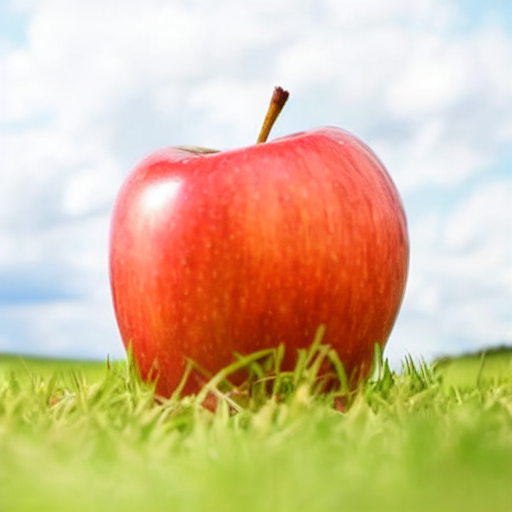

In [64]:
prompt ="photograph of an apple similar to the real world on a   green grass field , blue sky, and clouds in the background"
# Run the pipeline
img = pipe(
    prompt=prompt,
    image=init_img,
    strength=0.85,
    generator=generator
).images[0]
img

  0%|          | 0/37 [00:00<?, ?it/s]

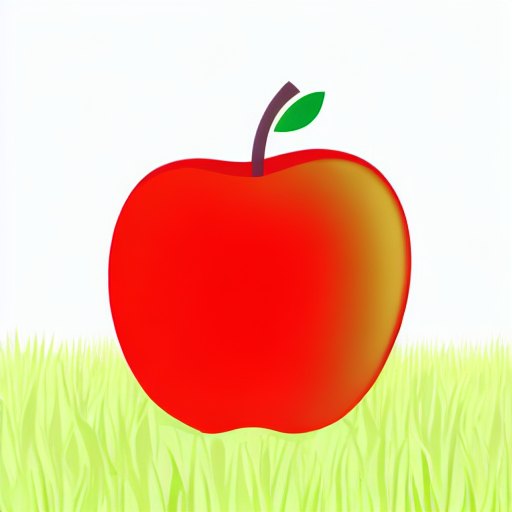

In [65]:
prompt ="photograph of an apple similar to the real world on a   green grass field , blue sky, and clouds in the background"
# Run the pipeline
img = pipe(
    prompt=prompt,
    image=init_img,
    strength=0.75,
    generator=generator
).images[0]
img

# testing the different model: Modi

In [66]:
modi = StableDiffusionImg2ImgPipeline.from_pretrained("nitrosocke/mo-di-diffusion", torch_dtype=torch.float16)
modi = modi.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/47 [00:00<?, ?it/s]

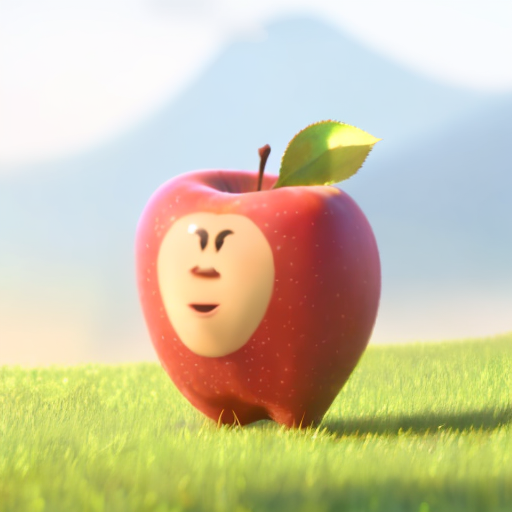

In [69]:
prompt = "modern disney, an apple falling from a tree, mountains in the background"
generator = torch.Generator(device=device).manual_seed(seed)
# Run the pipeline
img = modi(
    prompt=prompt,
    image=init_img,
    strength=0.95,
    scale = 10.5,
    generator=generator
).images[0]
img

# Image to Image "editing" (instructPix2Pix)

In [70]:
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
instruct = StableDiffusionInstructPix2PixPipeline.from_pretrained("timbrooks/instruct-pix2pix", torch_dtype=torch.float16, use_auth_token=True)
instruct.scheduler = EulerAncestralDiscreteScheduler.from_config(instruct.scheduler.config)
instruct = instruct.to("cuda")

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionInstructPix2PixPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

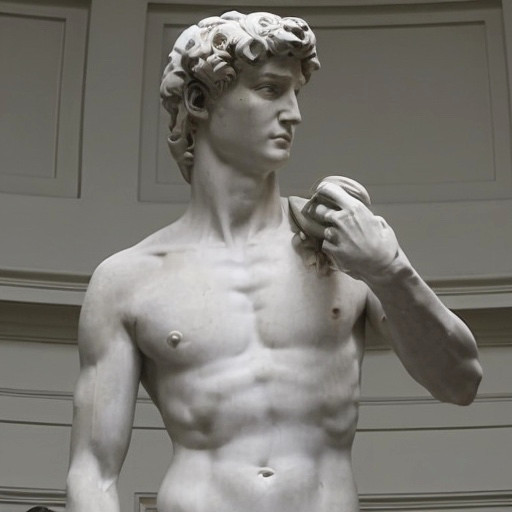

In [73]:

image = Image.open("/content/michelangelo.jpg")
image = image.resize((512,512))
image

  0%|          | 0/20 [00:00<?, ?it/s]

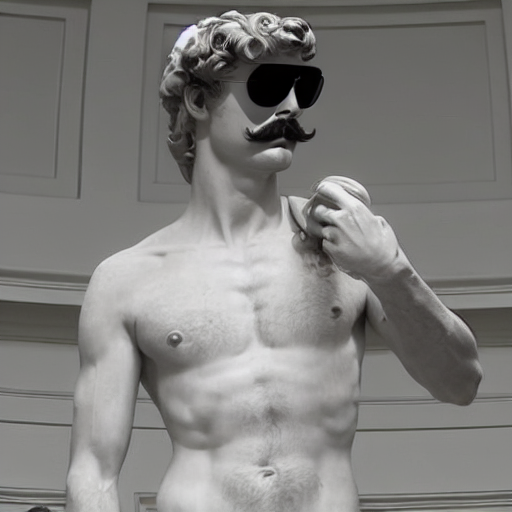

In [76]:
prompt= "give him a  moustache, add a sun glasses"
seed = 777
generator = torch.Generator(device=device).manual_seed(seed)
result_img = instruct(prompt, image, num_inference_steps=20, image_guidance_scale =1 , generator = generator).images[0]
result_img

  0%|          | 0/20 [00:00<?, ?it/s]

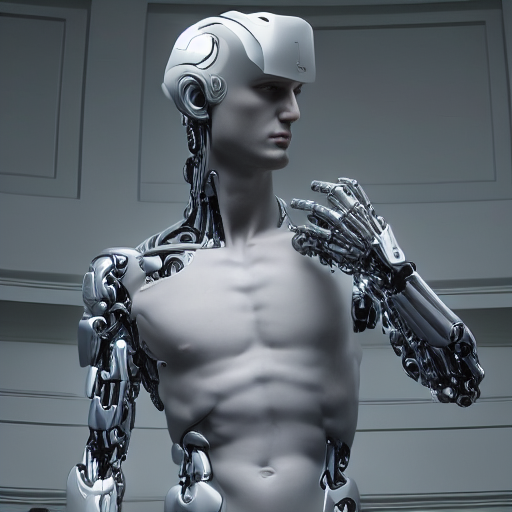

In [77]:
prompt= "turn him into a cyborg"
seed = 777
generator = torch.Generator(device=device).manual_seed(seed)
result_img = instruct(prompt, image, num_inference_steps=20, image_guidance_scale =1 , generator = generator).images[0]
result_img

  0%|          | 0/20 [00:00<?, ?it/s]

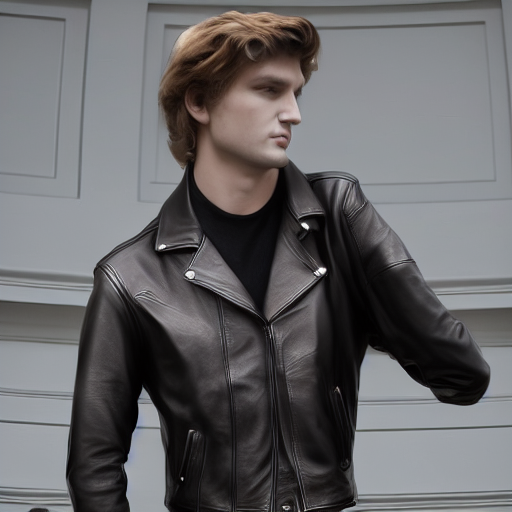

In [78]:
prompt= "make him wear a leather jacket"
seed = 777
generator = torch.Generator(device=device).manual_seed(seed)
result_img = instruct(prompt, image, num_inference_steps=20, image_guidance_scale =1 , generator = generator).images[0]
result_img

  0%|          | 0/20 [00:00<?, ?it/s]

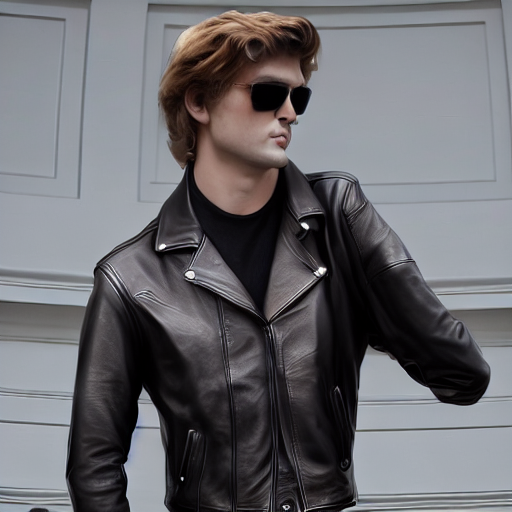

In [79]:
prompt= "add sunglasses"
seed = 777
generator = torch.Generator(device=device).manual_seed(seed)
result_img1 = instruct(prompt, result_img, num_inference_steps=20, image_guidance_scale =1 , generator = generator).images[0]
result_img1